<a href="https://colab.research.google.com/github/emm-gl/WA2501_Machine_Learning_AI/blob/main/MA2502_Matem%C3%A1ticasParaLaCienciaDeDatos/Examen_parcial_02_AlgebraLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen parcial 02: Algebra Lineal

Emmanuel Gonzalez Calitl

Octubre 2025

Para aprobar el examen es necesario resolver los 3 ejercicios de la siguiente
lista. Debe entregarse un Google Collab y compartirse con los profesores del
curso sin darles permiso de edición. La fecha límite de entrega es el lunes de
la semana 9.


### 1. Sin utilizar Numpy defina una función en Python para multiplicar dos
matrices de tamaño arbitrario.


In [ ]:
def MatMul(A, B):
    #Condiciones:
    #Revisar que el número de columnas de la matriz A sea igual al número de filas de la matriz B
    rowsA = len(A)
    colsB = len(B[0])

    if rowsA  != colsB:
      print("Error el número de filas de la matriz A debe ser igual al número de columnas de la matriz B")
      print("Número de filas de la matriz A: ", rowsA)
      print("Número de columnas de la matriz B: ", colsB)
      return

    #Multiplicación:
    C = [[0 for _ in range(colsB)] for _ in range(rowsA)]       #Initialize the new matrix

    for i in range(rowsA):                  #Iterar en cada fila de A
      for j in range(colsB):                #Iterar en cada columna B
        for k in range(len(B)):             #Iterar en cada fila de B
          C[i][j] += A[i][k] * B[k][j]      #Producto punto

    return C

In [ ]:
#Matrices a multiplicar:
A = [
    [1, 2, 3],
    [4, 5, 6]
    ]

B = [[5, -1],
     [1, 0],
     [-2, 3]
     ]

C = MatMul(A, B)

#Impresión de Matriz de manera visual:
for fila in C:
    print(" ".join(map(str, fila)))

1 8
13 14


### 2. Utilizar la descomposición en valores singulares para resolver alguno de los sistemas de ecuaciones de la primera semana.

Tomando un sistema de ecuaciones de la primera semana:

$$
2x + 3y - 4z = 7 \\
-2x + 3y + 4z = 3 \\
x + y + z = 0
$$


Para resolver un sistema lineal:

$$ A x = b $$

donde:

- \(A\) es una matriz de tamaño \(m $*$ n\)
- \(x\) es el vector incógnita
- \(b\) es el vector de resultados

El objetivo es encontrar \(x\) tal que la ecuación se cumpla (o se aproxime si no hay solución exacta).

#### Método SVD

1. **Descomponer la matriz:**
   $$ A = U \Sigma V^T $$

2. **Invertir los valores singulares distintos de cero:**
   $$ \Sigma^+ = \text{diag}\left(\frac{1}{\sigma_i}\right) $$

3. **Calcular la pseudoinversa:**
   $$ A^+ = V \Sigma^+ U^T $$

4. **Obtener la solución (o mejor aproximación en mínimos cuadrados):**
   $$ x = A^+ b $$


In [ ]:
import numpy as np

# Sistema: A·x = b
A = np.array([
    [2, 3, -4],
    [-2, 3, 4],
    [1, 1, 1]
], dtype=float)

b = np.array([7, 3, 0], dtype=float)

# Descomposición SVD
U, S, Vt = np.linalg.svd(A)

# Construir Σ⁺ (invertir valores singulares no nulos)
S_inv = np.zeros((Vt.shape[0], U.shape[0]))
for i in range(len(S)):
    if S[i] > 1e-10:
        S_inv[i, i] = 1 / S[i]

# Pseudoinversa y solución
A_pinv = Vt.T @ S_inv @ U.T
x = A_pinv @ b

print("Solución usando SVD:\n", x)


Solución usando SVD:
 [-0.77777778  1.66666667 -0.88888889]


Verificación de resultados por el método de numpy *linalg.solve()* :

In [ ]:
# Matriz de coeficientes A y vector b
A = np.array([
    [2, 3, -4],
    [-2, 3, 4],
    [1, 1, 1]
], dtype=float)

b = np.array([7, 3, 0], dtype=float)

# --- Método: usando np.linalg.solve (resolución directa) ---
x_solve = np.linalg.solve(A, b)
print("Solución con np.linalg.solve():")
print(x_solve)

Solución con np.linalg.solve():
[-0.77777778  1.66666667 -0.88888889]


### 3. Utilizando la base de datos MNIST, comparar la reducción de PCA contra la de descomposición en valores singulares. La métrica que utilizaremos será la medida del coseno promedio (al reducir la dimensión) entre las imágenes del mismo dígito.

In [4]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import fetch_openml
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from tqdm import tqdm

# Descargar dataset MNIST

print("Cargando dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # normalizamos a [0,1]
y = mnist.target.astype(int)

# Tomamos una muestra pequeña
n_samples = 5000
idx = np.random.choice(len(X), n_samples, replace=False)
X = X[idx]
y = y[idx]

print(f"Usando {n_samples} imágenes.")

Cargando dataset MNIST...
Usando 5000 imágenes.


In [2]:
# Función para medir la similitud coseno promedio
def mean_cosine_similarity(X_reduced, y):
    """
    Calcula la similitud coseno promedio entre imágenes del mismo dígito.
    """
    sim_per_digit = []
    for digit in np.unique(y):
        mask = y == digit
        X_digit = X_reduced[mask]
        # Matriz de similitud coseno
        sims = cosine_similarity(X_digit)
        # Promedio de la mitad superior (sin diagonal)
        mean_sim = np.mean(sims[np.triu_indices_from(sims, k=1)])
        sim_per_digit.append(mean_sim)
    return np.mean(sim_per_digit)


Reduciendo dimensiones: 100%|██████████| 6/6 [00:18<00:00,  3.09s/it]


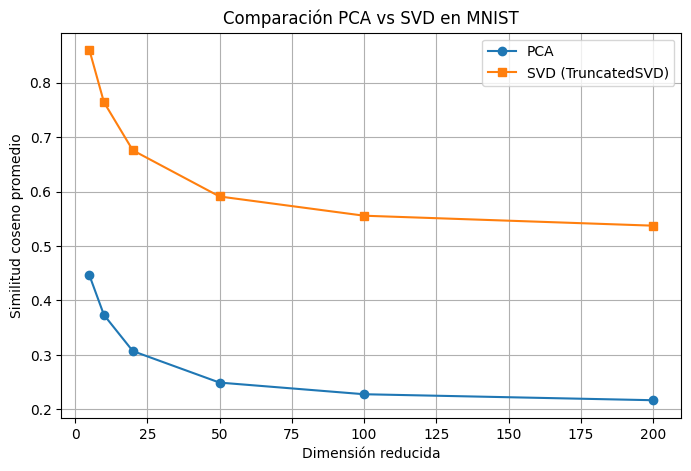

In [5]:
# Evaluar diferentes dimensiones reducidas

dims = [5, 10, 20, 50, 100, 200]
pca_scores = []
svd_scores = []

for d in tqdm(dims, desc="Reduciendo dimensiones"):
    # PCA
    pca = PCA(n_components=d)
    X_pca = pca.fit_transform(X)
    pca_scores.append(mean_cosine_similarity(X_pca, y))

    # SVD truncada
    svd = TruncatedSVD(n_components=d)
    X_svd = svd.fit_transform(X)
    svd_scores.append(mean_cosine_similarity(X_svd, y))


# Graficar los resultados
plt.figure(figsize=(8,5))
plt.plot(dims, pca_scores, 'o-', label='PCA')
plt.plot(dims, svd_scores, 's-', label='SVD (TruncatedSVD)')
plt.xlabel('Dimensión reducida')
plt.ylabel('Similitud coseno promedio')
plt.title('Comparación PCA vs SVD en MNIST')
plt.legend()
plt.grid(True)
plt.show()
